## ROC Plot: HMMER vs MMseqs vs MMore

## PROFMARK dataset

In [1]:
#imports
from __future__ import print_function
import sys
import os
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

In [2]:
# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)

In [3]:
# root directory
path_to_db = "data/profmark/"

In [4]:
# index filepaths
target_index_fname = "{}/pmark.hmm.idx".format(path_to_db)
query_index_fname = "{}/pmark.fa.idx".format(path_to_db)

In [5]:
# data filepaths
hmmer_p2s_fname = "{}/hmmer.profmark.p2s.002.tf".format(path_to_db)
hmmer_s2s_fname = "{}/hmmer.profmark.s2s.002.tf".format(path_to_db)

my_id = ".002"
mmseqs_s2s_k95_fname  = "{}/mmseqs.profmark.s2s.k95{}.tf".format(path_to_db, my_id)
mmseqs_s2s_k80_fname  = "{}/mmseqs.profmark.s2s.k80{}.tf".format(path_to_db, my_id)
mmseqs_s2s_k75_fname  = "{}/mmseqs.profmark.s2s.k75{}.tf".format(path_to_db, my_id)

# mmseqs_p2s_k95_fname  = "{}/mmseqs.profmark.p2s.k95{}.tf".format(path_to_db, my_id)
# mmseqs_p2s_k80_fname  = "{}/mmseqs.profmark.p2s.k80{}.tf".format(path_to_db, my_id)
# mmseqs_p2s_k75_fname  = "{}/mmseqs.profmark.p2s.k75{}.tf".format(path_to_db, my_id)

mmseqs_p2s_k95_fname  = "{}/alignDB_k95_p2s.m8.tf".format(path_to_db)
mmseqs_p2s_k80_fname  = "{}/alignDB_k80_p2s.m8.tf".format(path_to_db)
mmseqs_p2s_k75_fname  = "{}/alignDB_k75_p2s.m8.tf".format(path_to_db)

params = ".12.16.5.001"
mmore_p2s_k95_cut_fname  = "{}/mmore.profmark.p2s.12.16.k95.cut.026.tf".format(path_to_db)
mmore_p2s_k80_cut_fname  = "{}/mmore.profmark.p2s.12.16.k80.cut.026.tf".format(path_to_db)
mmore_p2s_k75_cut_fname  = "{}/mmore.profmark.p2s.12.16.k75.cut.026.tf".format(path_to_db)

mmore_p2s_k95_all_fname  = "{}/mmore.profmark.p2s.k95.12.16.all.5.tf".format(path_to_db)
mmore_p2s_k80_all_fname  = "{}/mmore.profmark.p2s.k80.12.16.all.5.tf".format(path_to_db)
mmore_p2s_k75_all_fname  = "{}/mmore.profmark.p2s.k75.12.16.all.5.tf".format(path_to_db)
# override 
mmore_p2s_k95_all_fname2   = "{}/mmore.profmark.p2s.k95.12.20.all.tf".format(path_to_db)
mmore_p2s_k80_all_fname2   = "{}/mmore.profmark.p2s.k80.12.20.all.tf".format(path_to_db)
mmore_p2s_k75_all_fname2   = "{}/mmore.profmark.p2s.k75.12.20.all.tf".format(path_to_db)

mmore_p2s_k95_cut_fname2  = "{}/mmore.profmark.p2s.k95.cut.12.16.2.m8out.tf".format(path_to_db)
mmore_p2s_k80_cut_fname2  = "{}/mmore.profmark.p2s.k80.cut.12.16.2.m8out.tf".format(path_to_db)
mmore_p2s_k75_cut_fname2  = "{}/mmore.profmark.p2s.k75.cut.12.16.2.m8out.tf".format(path_to_db)

mmore_p2s_k95_cut_fname1  = "{}/mmore.profmark.p2s.k95.cut.12.16.1.m8out.tf".format(path_to_db)

mmore_s2s_k95_cut_fname  = "{}/mmore.profmark.s2s.12.16.k95.cut.tf".format(path_to_db, params)
mmore_s2s_k95_all_fname  = "{}/mmore.profmark.s2s.12.16.k95.all.tf".format(path_to_db, params)
mmore_s2s_k80_cut_fname  = "{}/mmore.profmark.s2s.12.16.k80.cut.tf".format(path_to_db, params)
mmore_s2s_k80_all_fname  = "{}/mmore.profmark.s2s.12.16.k80.all.tf".format(path_to_db, params)
mmore_s2s_k75_cut_fname  = "{}/mmore.profmark.s2s.12.16.k75.cut.tf".format(path_to_db, params)
mmore_s2s_k75_all_fname  = "{}/mmore.profmark.s2s.12.16.k75.all.tf".format(path_to_db, params)

In [6]:
# Total Queries and Targets
total_target       =    211547
total_query        =      2141
total_target_real  =     11547 
total_target_decoy =    200000
# Total True Positives and Negatives
total_res = 452922127
total_TP  =     11547
total_TN  = 428200000
unknown   =  24710580
TP_to_TN  =  2.70e-05

In [7]:
# runtimes

# hmmer
hmmer_times = {}
hmmer_times["ps-search"]    = 8619.49
hmmer_times["ss-search"]    = 8619.49

# mmseqs
mmseqs_times = {}
mmseqs_times["ps-build"] = mmseqs_build = 197.80

mmseqs_times["ss-k95"]   = 1229.28 + mmseqs_build
mmseqs_times["ss-k80"]   = 4328.03 + mmseqs_build
mmseqs_times["ss-k75"]   = 6365.85 + mmseqs_build

mmseqs_times["ps-k95"]   = 1229.28 + mmseqs_build
mmseqs_times["ps-k80"]   = 4328.03 + mmseqs_build
mmseqs_times["ps-k75"]   = 6365.85 + mmseqs_build

# fbpruner
mmore_times = {}
mmore_times["ss-index"]  = 14.0
mmore_times["ss-build"]  = 0.0

mmore_times["ss-k95-cut"]   = 434.73  + mmseqs_times["ss-k95"]
mmore_times["ss-k95-all"]   = 1085.99 + mmseqs_times["ss-k95"]
mmore_times["ss-k80-cut"]   = 3543.53 + mmseqs_times["ss-k80"]
mmore_times["ss-k80-all"]   = 4221.40 + mmseqs_times["ss-k80"]
mmore_times["ss-k75-cut"]   = 3712.58 + mmseqs_times["ss-k75"]
mmore_times["ss-k75-all"]   = 4417.08 + mmseqs_times["ss-k75"]

mmore_times["ps-k95-cut"]   = 1839.65 + mmseqs_times["ps-k95"] # 21146
mmore_times["ps-k95-all"]   = 45585.33 + mmseqs_times["ps-k95"] # 814340
mmore_times["ps-k80-cut"]   = 2447.51 + mmseqs_times["ps-k80"] # 29801
mmore_times["ps-k80-all"]   = 0 + mmseqs_times["ps-k80"]
mmore_times["ps-k75-cut"]   = 2539.31 + mmseqs_times["ps-k75"] # 31573
mmore_times["ps-k75-all"]   = 0 + mmseqs_times["ps-k75"]


# load data

In [8]:
datas = []

# set header format
tf_dformat = {
    "target_name": "str",
    "query_name": "str",
    "eval": "float",
    "truth": "str",
    "tot_T": "int",
    "tot_F": "int",
    "tot_?": "int"
}
tf_header = tf_dformat.keys()

# load data
usecols = [0,1,2,3,4,5]
skiprows = None
sep = " "
names = tf_header

In [9]:
hmmer_p2s_data = pd.read_csv( hmmer_p2s_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(hmmer_p2s_data)
hmmer_s2s_data = pd.read_csv( hmmer_s2s_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(hmmer_s2s_data)

In [10]:
mmseqs_s2s_k95_data = pd.read_csv( mmseqs_s2s_k95_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_s2s_k95_data)
mmseqs_s2s_k80_data = pd.read_csv( mmseqs_s2s_k80_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_s2s_k80_data)
mmseqs_s2s_k75_data = pd.read_csv( mmseqs_s2s_k75_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_s2s_k75_data)

In [11]:
mmseqs_p2s_k95_data = pd.read_csv( mmseqs_p2s_k95_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_p2s_k95_data)
mmseqs_p2s_k80_data = pd.read_csv( mmseqs_p2s_k80_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_p2s_k80_data)
mmseqs_p2s_k75_data = pd.read_csv( mmseqs_p2s_k75_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_p2s_k75_data)

FileNotFoundError: [Errno 2] No such file or directory: 'data/profmark//alignDB_k95_p2s.m8.tf'

In [116]:
# mmore_p2s_k95_cut_data = pd.read_csv( mmore_p2s_k95_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# datas.append(mmore_p2s_k95_cut_data)
mmore_p2s_k95_all_data = pd.read_csv( mmore_p2s_k95_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k95_all_data)
mmore_p2s_k80_cut_data = pd.read_csv( mmore_p2s_k80_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k80_cut_data)

mmore_p2s_k80_all_data = pd.read_csv( mmore_p2s_k80_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k80_all_data)
mmore_p2s_k75_cut_data = pd.read_csv( mmore_p2s_k75_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k75_cut_data)
mmore_p2s_k75_all_data = pd.read_csv( mmore_p2s_k75_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k75_all_data)

In [117]:
mmore_p2s_k95_cut_data2 = pd.read_csv( mmore_p2s_k95_cut_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k95_cut_data2)
mmore_p2s_k80_cut_data2 = pd.read_csv( mmore_p2s_k80_cut_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k80_cut_data2)
mmore_p2s_k75_cut_data2 = pd.read_csv( mmore_p2s_k75_cut_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k75_cut_data2)

mmore_p2s_k95_all_data2 = pd.read_csv( mmore_p2s_k95_all_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k95_all_data2)
mmore_p2s_k80_all_data2 = pd.read_csv( mmore_p2s_k80_all_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k80_all_data2)
mmore_p2s_k75_all_data2 = pd.read_csv( mmore_p2s_k75_all_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k75_all_data2)

In [118]:
mmore_p2s_k95_cut_data1 = pd.read_csv( mmore_p2s_k95_cut_fname1, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p2s_k95_cut_data1)
# # mmore_p2s_k95_all_data = pd.read_csv( mmore_p2s_k95_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# # datas.append(mmore_p2s_k95_all_data)
# mmore_p2s_k80_cut_data2 = pd.read_csv( mmore_p2s_k80_cut_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# datas.append(mmore_p2s_k80_cut_data2)
# # mmore_p2s_k80_all_data = pd.read_csv( mmore_p2s_k80_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# # datas.append(mmore_p2s_k80_all_data)
# mmore_p2s_k75_cut_data2 = pd.read_csv( mmore_p2s_k75_cut_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# datas.append(mmore_p2s_k75_cut_data2)
# # mmore_p2s_k75_all_data = pd.read_csv( mmore_p2s_k75_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# # datas.append(mmore_p2s_k75_all_data)

In [119]:
# mmore_s2s_k95_cut_data = pd.read_csv( mmore_s2s_k95_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# datas.append(mmore_s2s_k95_cut_data)
# # mmore_s2s_k95_all_data = pd.read_csv( mmore_s2s_k95_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# # datas.append(mmore_s2s_k95_all_data)
# mmore_s2s_k80_cut_data = pd.read_csv( mmore_s2s_k80_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# datas.append(mmore_s2s_k80_cut_data)
# # mmore_s2s_k80_all_data = pd.read_csv( mmore_s2s_k80_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# # datas.append(mmore_s2s_k80_all_data)
# mmore_s2s_k75_cut_data = pd.read_csv( mmore_s2s_k75_cut_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# datas.append(mmore_s2s_k75_cut_data)
# mmore_s2s_k75_all_data = pd.read_csv( mmore_s2s_k75_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
# datas.append(mmore_s2s_k75_all_data)

In [120]:
for data in datas:
    data["roc_y"] = data["tot_T"] / total_TP
#     data["roc_x"] = data["tot_F"] / total_query    
    data["roc_x"] = data["tot_F"]

In [121]:
data

,target_name,query_name,eval,truth,tot_T,tot_F,roc_y,roc_x
0,DUF3414,DUF3414/3365/148-1852/2031-3678,0.0,T,1,0,0.000087,0
1,DUF3414,DUF3414/3369/134-1775/1798-3786,0.0,T,2,0,0.000173,0
2,DUF3414,DUF3414/3370/56-1698/2027-3618,0.0,T,3,0,0.000260,0
3,DUF3584,DUF3584/3537/843-2018/2112-3305,0.0,T,4,0,0.000346,0
4,DUF3584,DUF3584/3538/591-1785/2358-3562,0.0,T,5,0,0.000433,0
...,...,...,...,...,...,...,...,...
21141,Zw10,decoy181488,210000.0,F,6299,13441,0.545510,13441
21142,Zw10,decoy189265,210000.0,F,6299,13442,0.545510,13442
21143,Zw10,decoy47385,210000.0,F,6299,13443,0.545510,13443
21144,Zw10,Zw10/11545/75-619/644-1248,210000.0,T,6300,13443,0.545596,13443


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


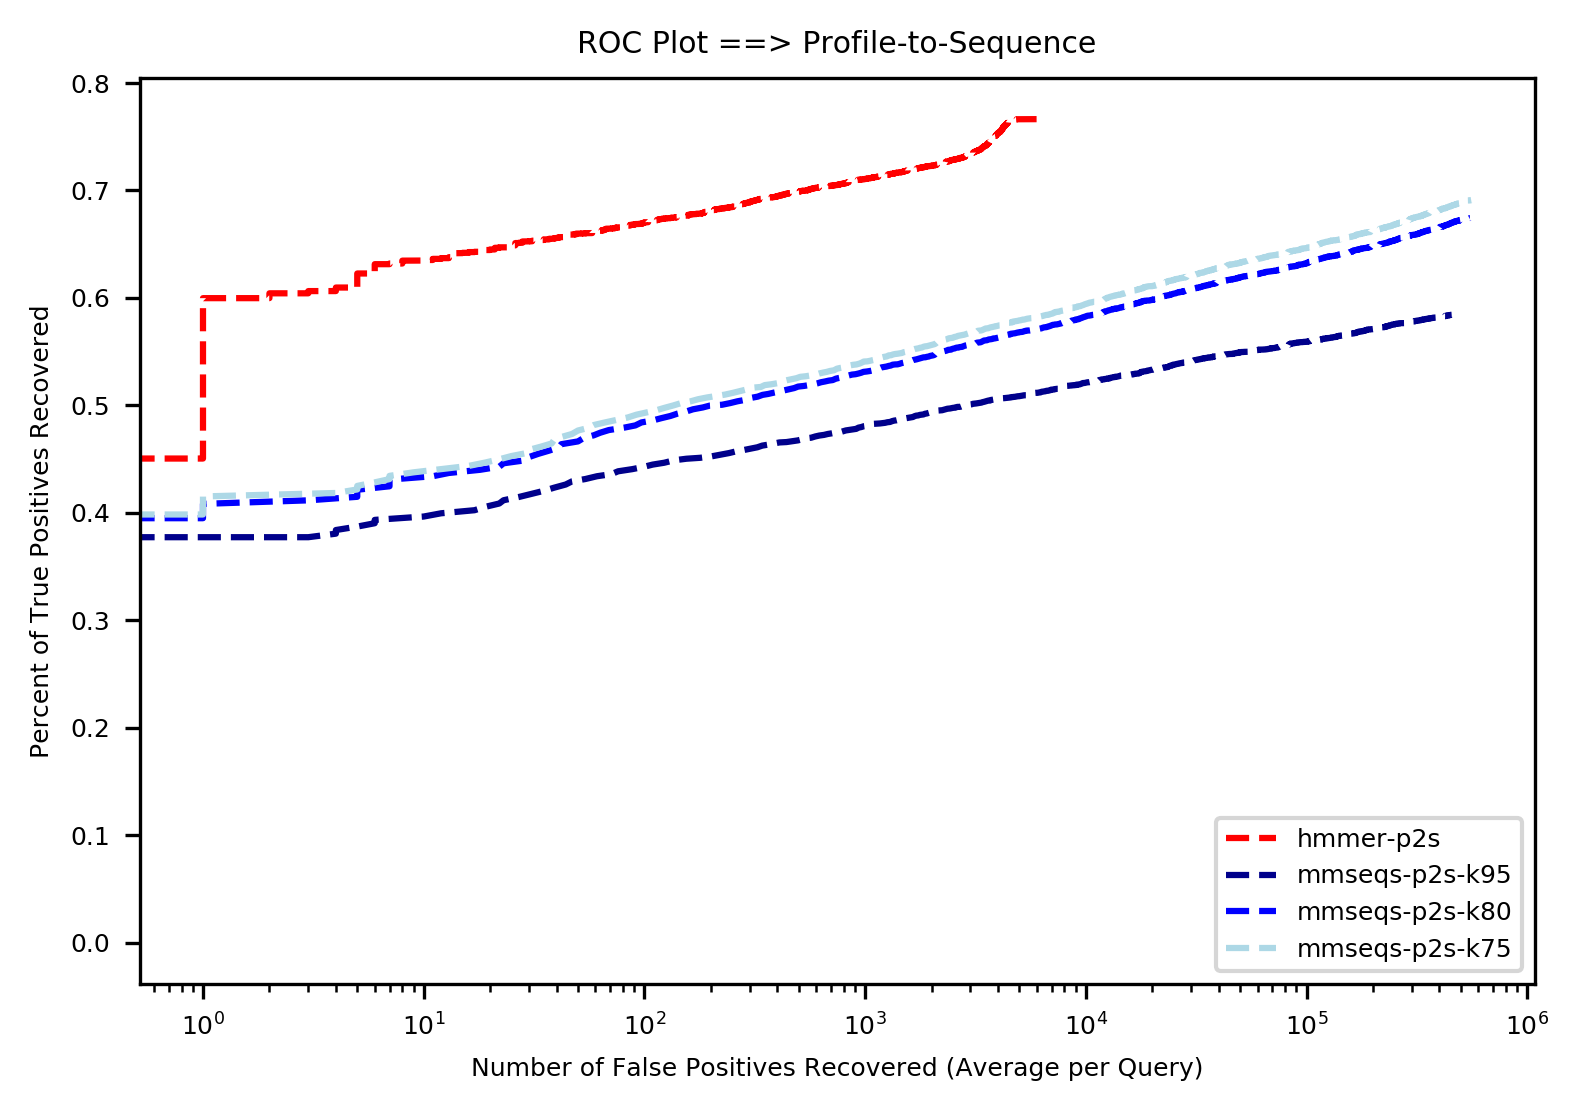

In [122]:
my_data = [ hmmer_p2s_data, mmseqs_p2s_k95_data, mmseqs_p2s_k80_data, mmseqs_p2s_k75_data ]
colors  = [ 'red', 'darkblue', 'blue', 'lightblue' ]
labels  = [ 'hmmer-p2s', 'mmseqs-p2s-k95','mmseqs-p2s-k80', 'mmseqs-p2s-k75' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

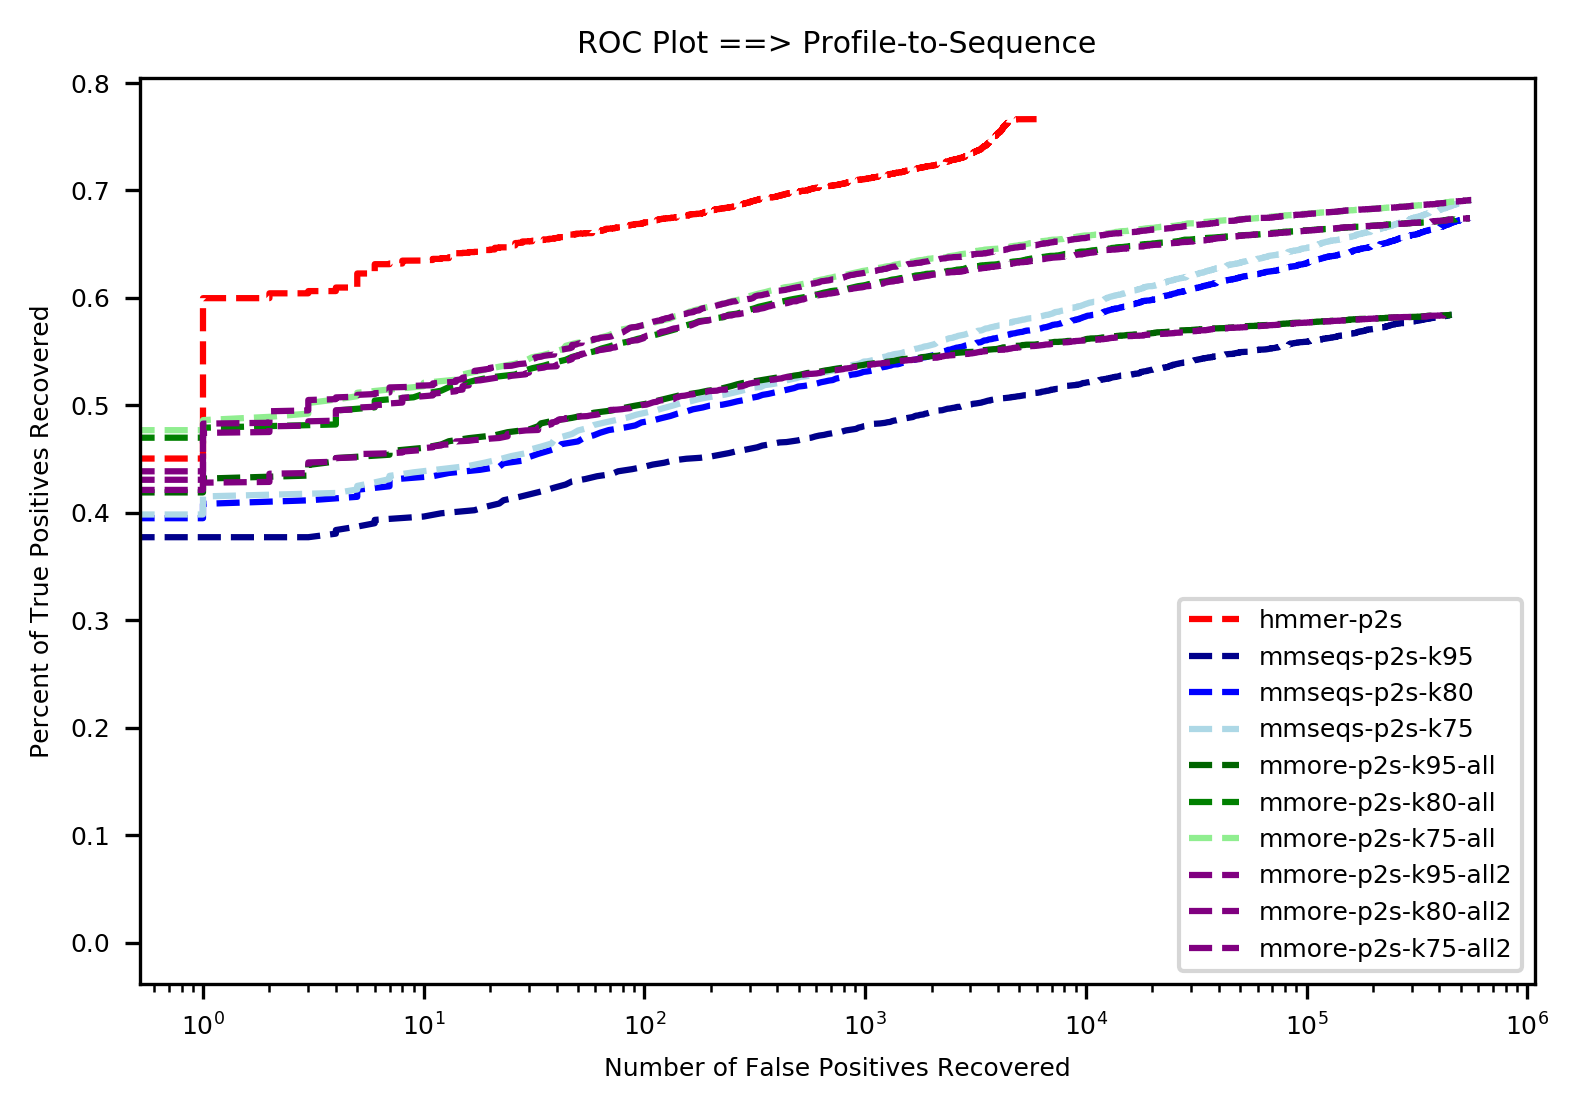

In [125]:
my_data = [ hmmer_p2s_data, mmseqs_p2s_k95_data, mmseqs_p2s_k80_data, mmseqs_p2s_k75_data, mmore_p2s_k95_all_data, mmore_p2s_k80_all_data, mmore_p2s_k75_all_data, mmore_p2s_k95_all_data2, mmore_p2s_k80_all_data2, mmore_p2s_k75_all_data2 ]
colors  = [ 'red', 'darkblue', 'blue', 'lightblue', 'darkgreen', 'green', 'lightgreen', 'purple', 'purple', 'purple' ]
labels  = [ 'hmmer-p2s', 'mmseqs-p2s-k95','mmseqs-p2s-k80', 'mmseqs-p2s-k75', 'mmore-p2s-k95-all', 'mmore-p2s-k80-all', 'mmore-p2s-k75-all', 'mmore-p2s-k95-all2', 'mmore-p2s-k80-all2', 'mmore-p2s-k75-all2' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

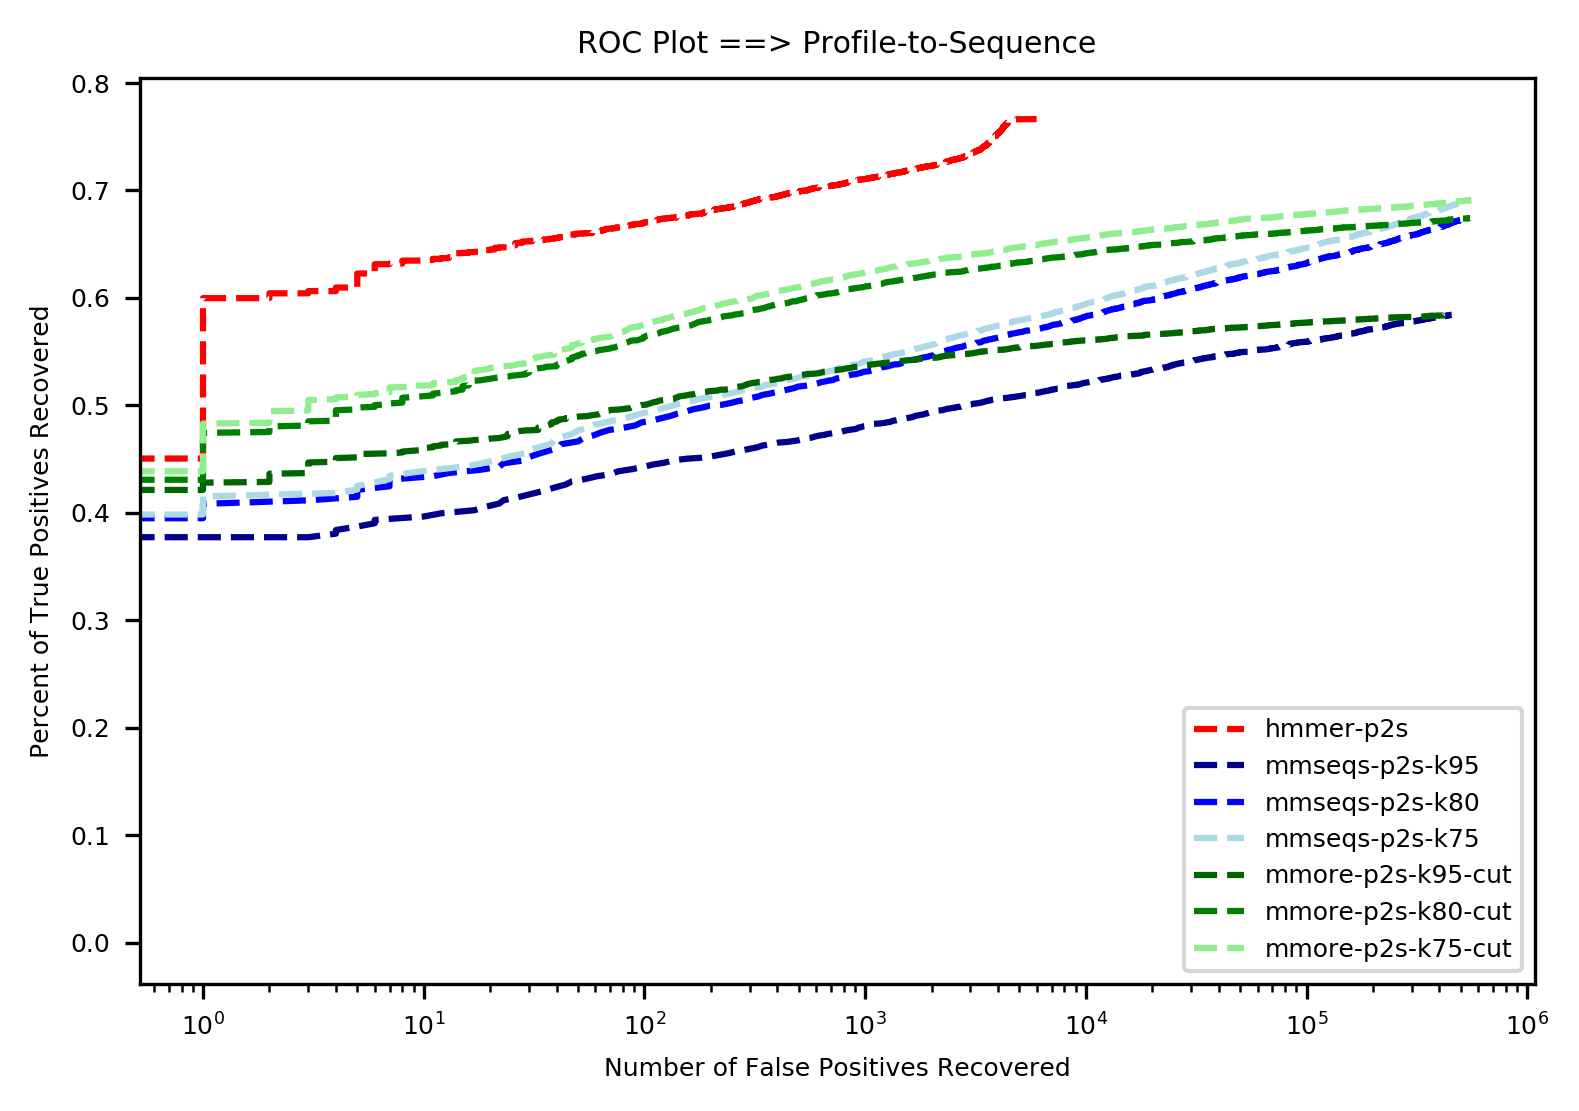

In [124]:
my_data = [ hmmer_p2s_data, mmseqs_p2s_k95_data, mmseqs_p2s_k80_data, mmseqs_p2s_k75_data, mmore_p2s_k95_all_data2, mmore_p2s_k80_all_data2, mmore_p2s_k75_all_data2 ]
colors  = [ 'red', 'darkblue', 'blue', 'lightblue', 'darkgreen', 'green', 'lightgreen' ]
labels  = [ 'hmmer-p2s', 'mmseqs-p2s-k95','mmseqs-p2s-k80', 'mmseqs-p2s-k75', 'mmore-p2s-k95-cut', 'mmore-p2s-k80-cut', 'mmore-p2s-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

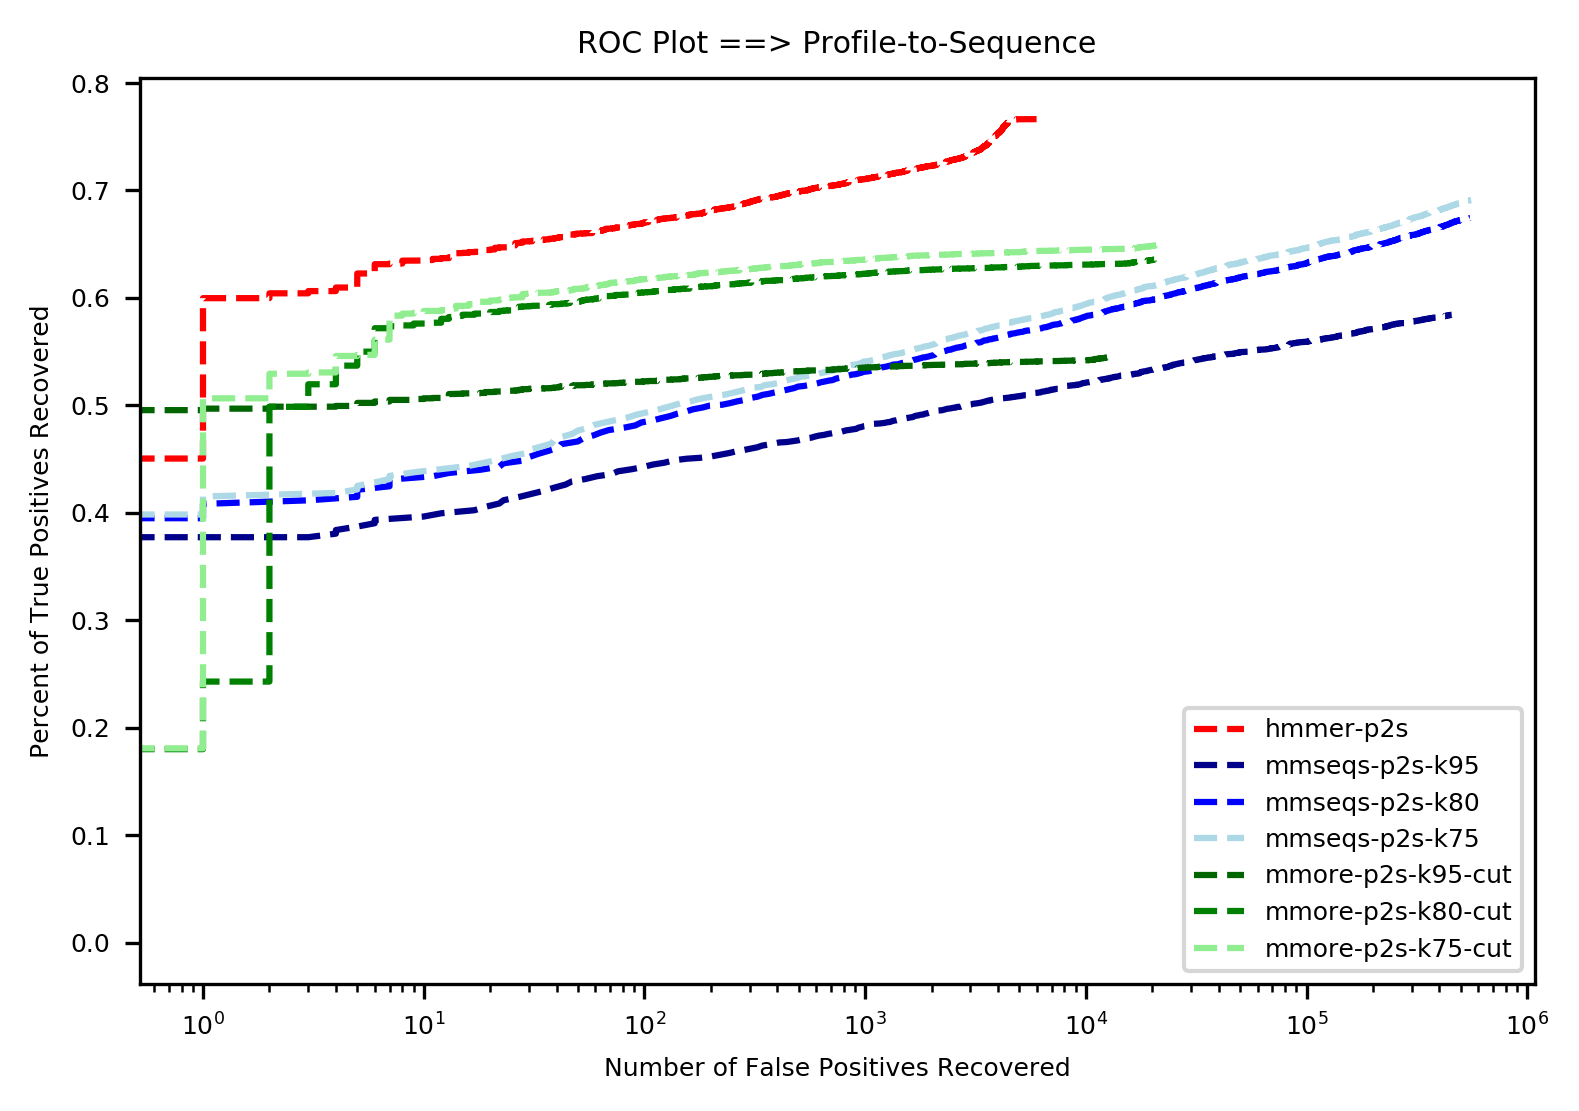

In [88]:
my_data = [ hmmer_p2s_data, mmseqs_p2s_k95_data, mmseqs_p2s_k80_data, mmseqs_p2s_k75_data, mmore_p2s_k95_cut_data2, mmore_p2s_k80_cut_data2, mmore_p2s_k75_cut_data2 ]
colors  = [ 'red', 'darkblue', 'blue', 'lightblue', 'darkgreen', 'green', 'lightgreen' ]
labels  = [ 'hmmer-p2s', 'mmseqs-p2s-k95','mmseqs-p2s-k80', 'mmseqs-p2s-k75', 'mmore-p2s-k95-cut', 'mmore-p2s-k80-cut', 'mmore-p2s-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot ==> Profile-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

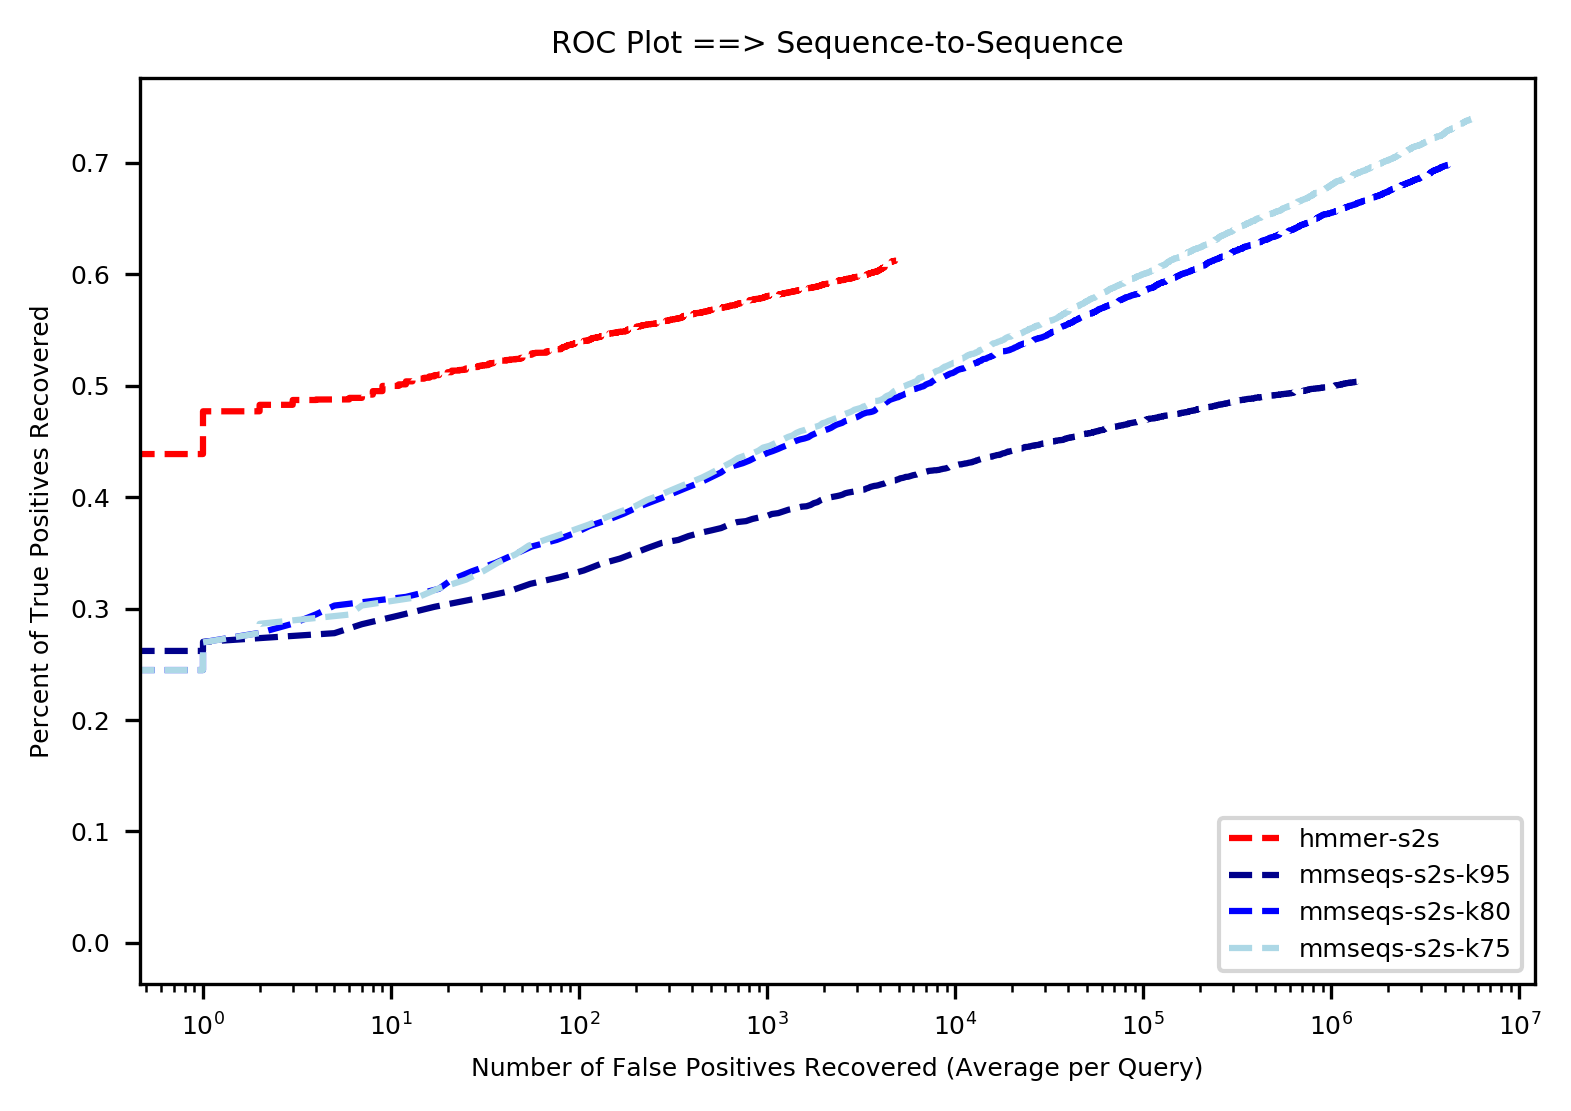

In [89]:
my_data = [ hmmer_s2s_data, mmseqs_s2s_k95_data, mmseqs_s2s_k80_data, mmseqs_s2s_k75_data ]
colors  = [ 'red', 'darkblue', 'blue', 'lightblue' ]
labels  = [ 'hmmer-s2s', 'mmseqs-s2s-k95','mmseqs-s2s-k80', 'mmseqs-s2s-k75' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot ==> Sequence-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

In [90]:
my_data = [ hmmer_s2s_data, mmseqs_s2s_k95_data, mmseqs_s2s_k80_data, mmseqs_s2s_k75_data, mmore_s2s_k95_cut_data, mmore_s2s_k80_cut_data, mmore_s2s_k75_cut_data ]
colors  = [ 'red', 'darkblue', 'blue', 'lightblue', 'darkgreen', 'green', 'lightgreen' ]
labels  = [ 'hmmer-s2s', 'mmseqs-s2s-k95','mmseqs-s2s-k80', 'mmseqs-s2s-k75', 'mmore-s2s-k95-cut', 'mmore-s2s-k80-cut', 'mmore-s2s-k75-cut' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot ==> Sequence-to-Sequence')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

NameError: name 'mmore_s2s_k95_cut_data' is not defined

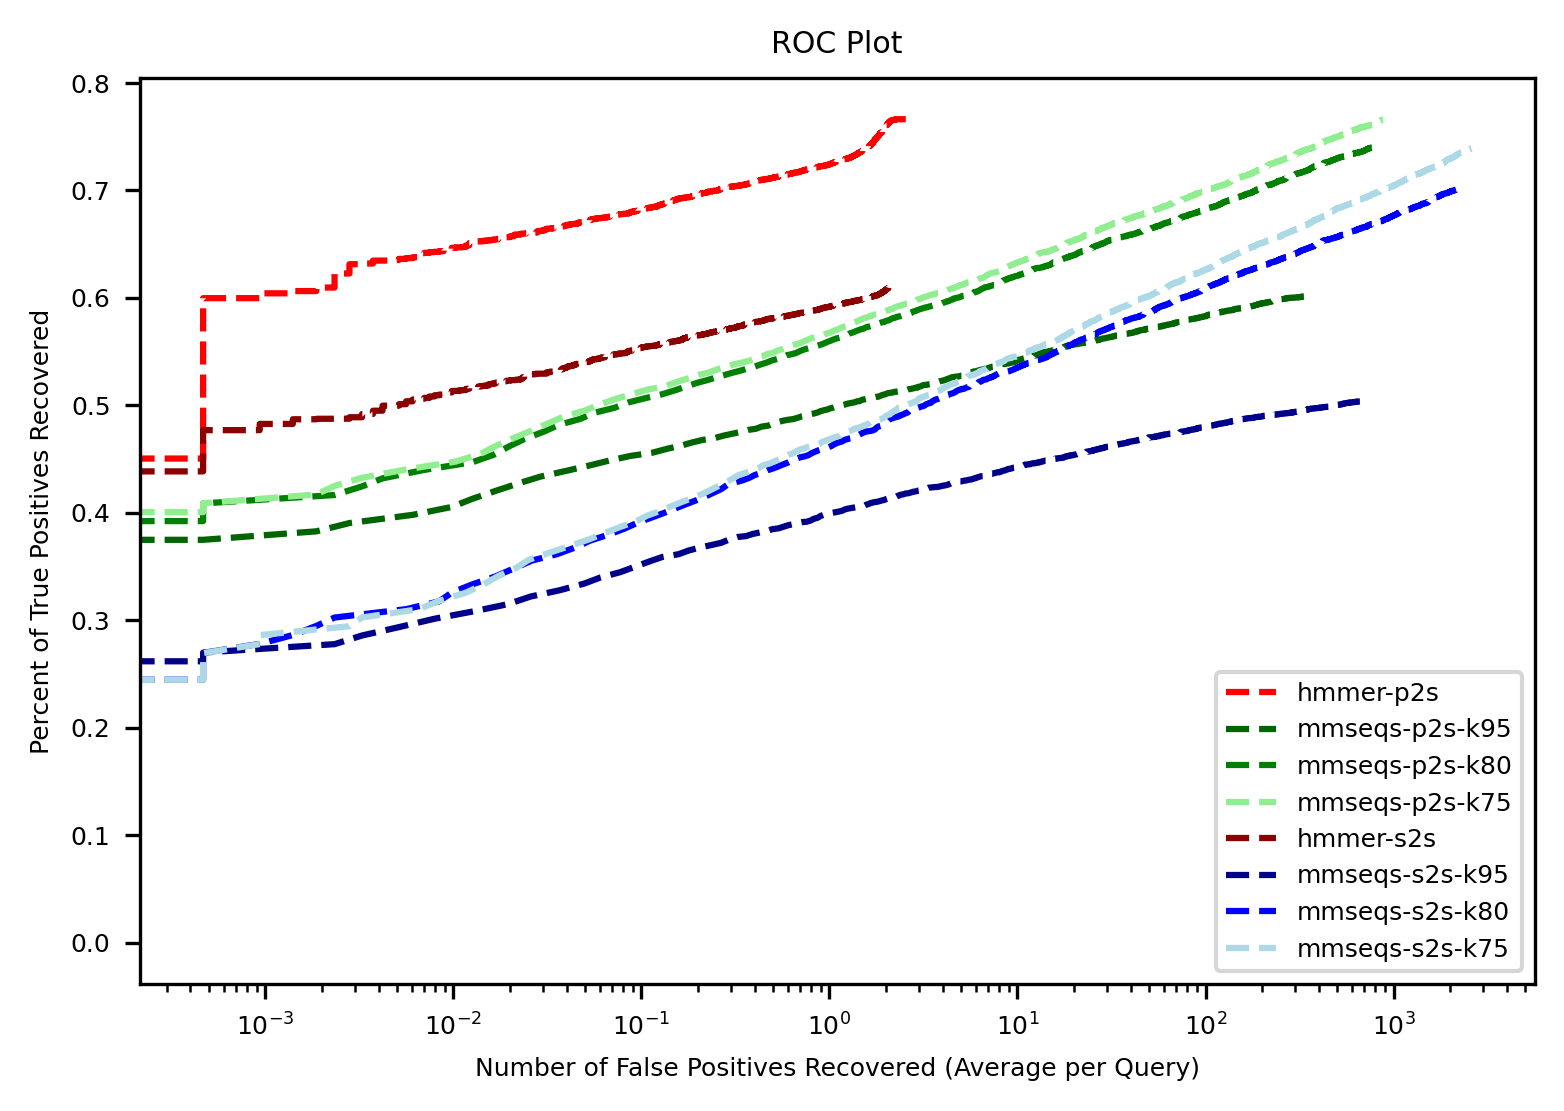

In [21]:
my_data = [ hmmer_p2s_data, mmseqs_p2s_k95_data, mmseqs_p2s_k80_data, mmseqs_p2s_k75_data, hmmer_s2s_data, mmseqs_s2s_k95_data, mmseqs_s2s_k80_data, mmseqs_s2s_k75_data ]
colors  = [ 'red', 'darkgreen', 'green', 'lightgreen', 'darkred', 'darkblue', 'blue', 'lightblue' ]
labels  = [ 'hmmer-p2s', 'mmseqs-p2s-k95','mmseqs-p2s-k80', 'mmseqs-p2s-k75', 'hmmer-s2s', 'mmseqs-s2s-k95','mmseqs-s2s-k80', 'mmseqs-s2s-k75' ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="--", marker=None )

plt.title('ROC Plot')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.svg")
plt.show()

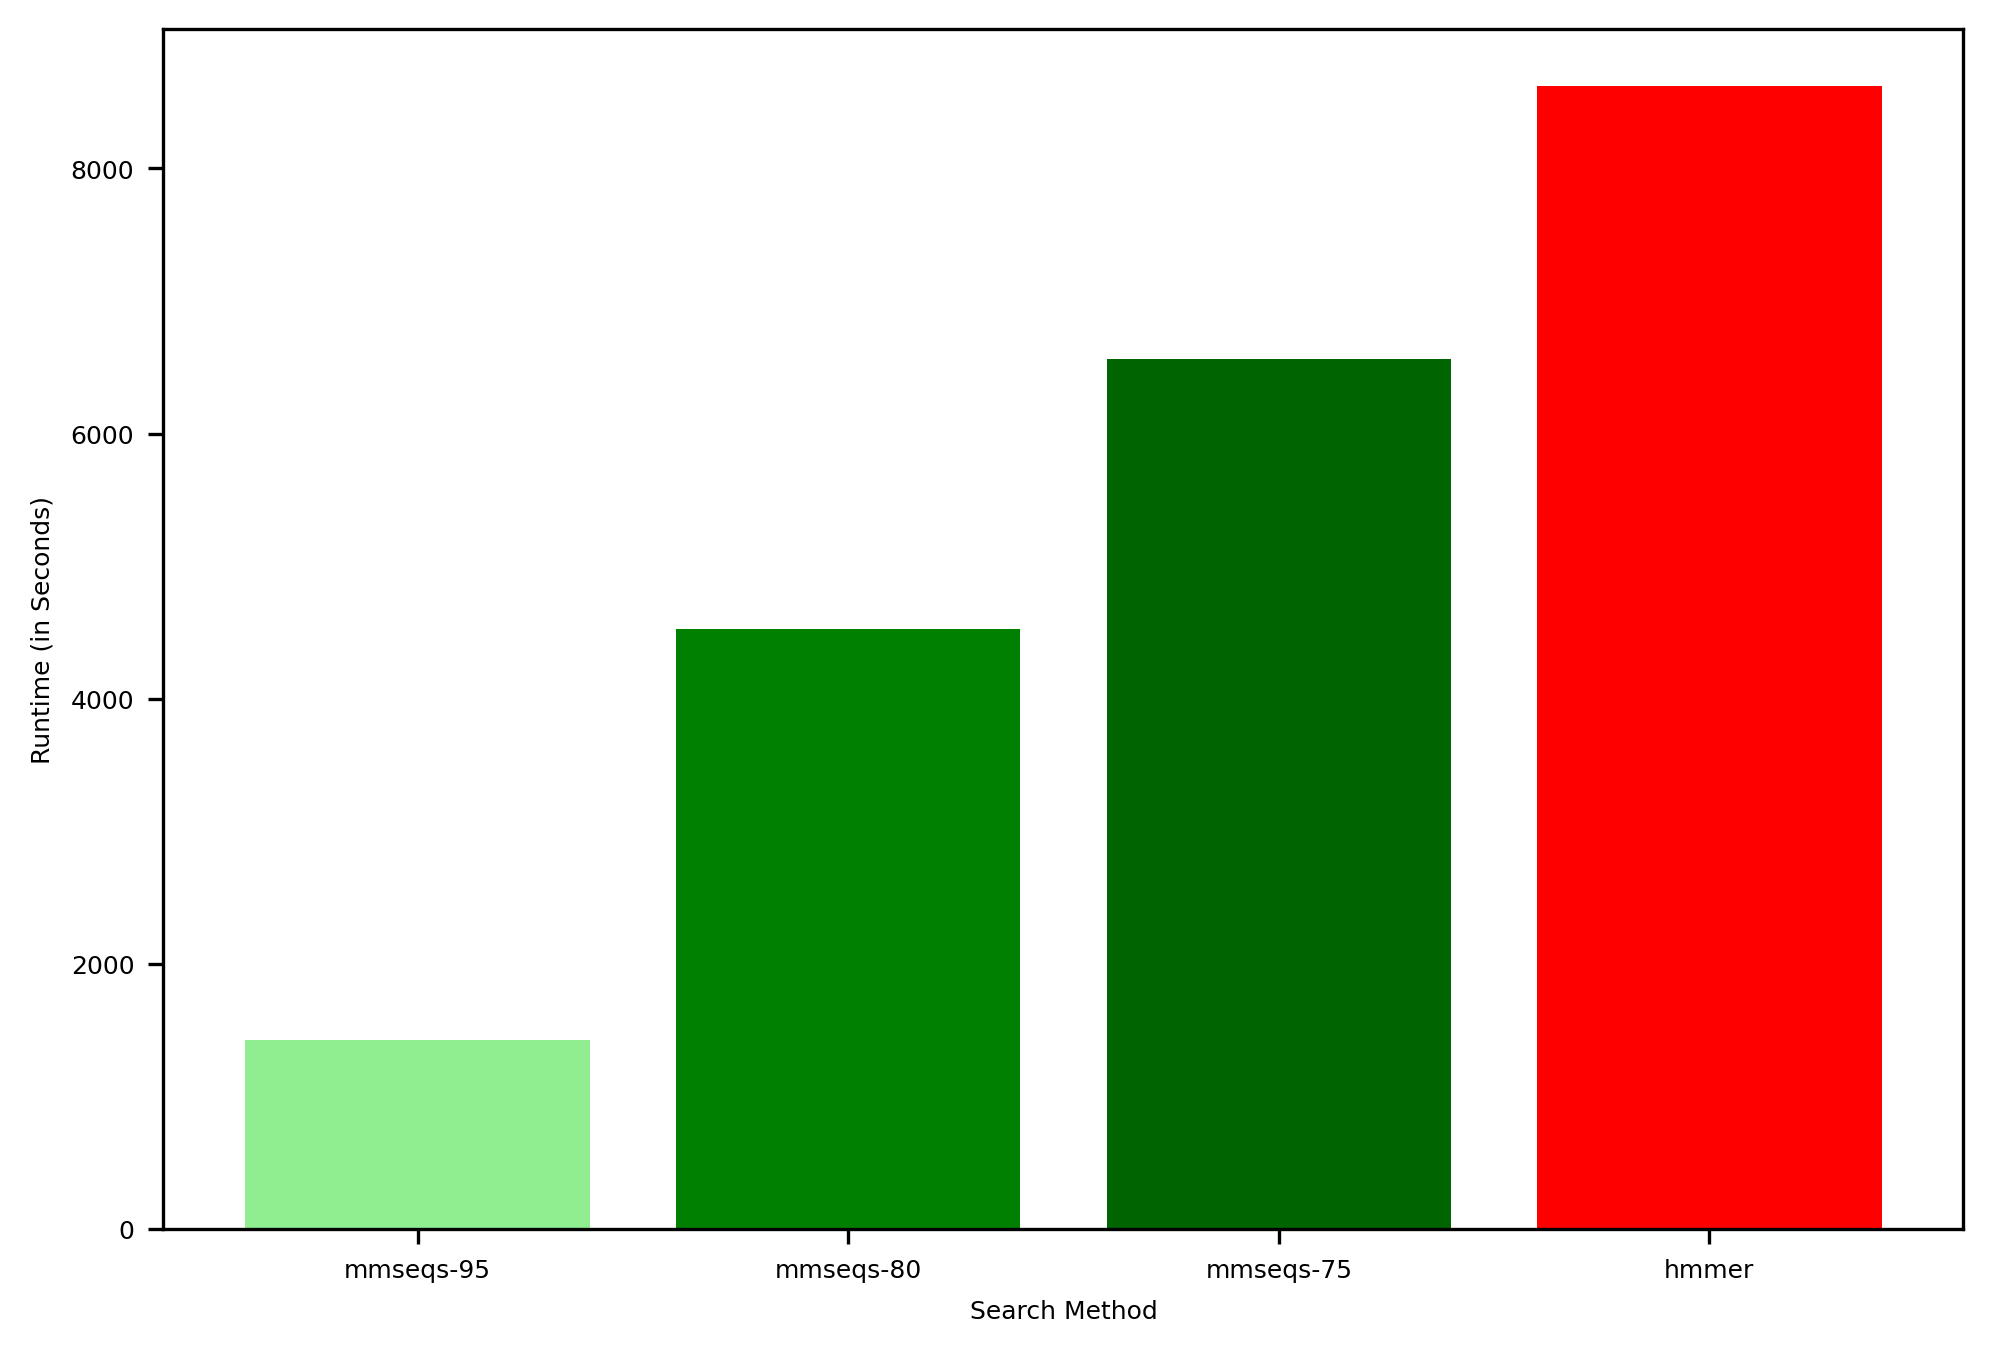

In [60]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['mmseqs-95', 'mmseqs-80', 'mmseqs-75', 'hmmer']
colors= ['lightgreen', 'green', 'darkgreen', 'red']
scalar = mmseqs_times['k95']
data = [ mmseqs_times['k95'], mmseqs_times['k80'], mmseqs_times['k75'], hmmer_times['total'] ]
ax.bar(xlabels, data, color=colors)
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()

NameError: name 'fbpruner_times' is not defined

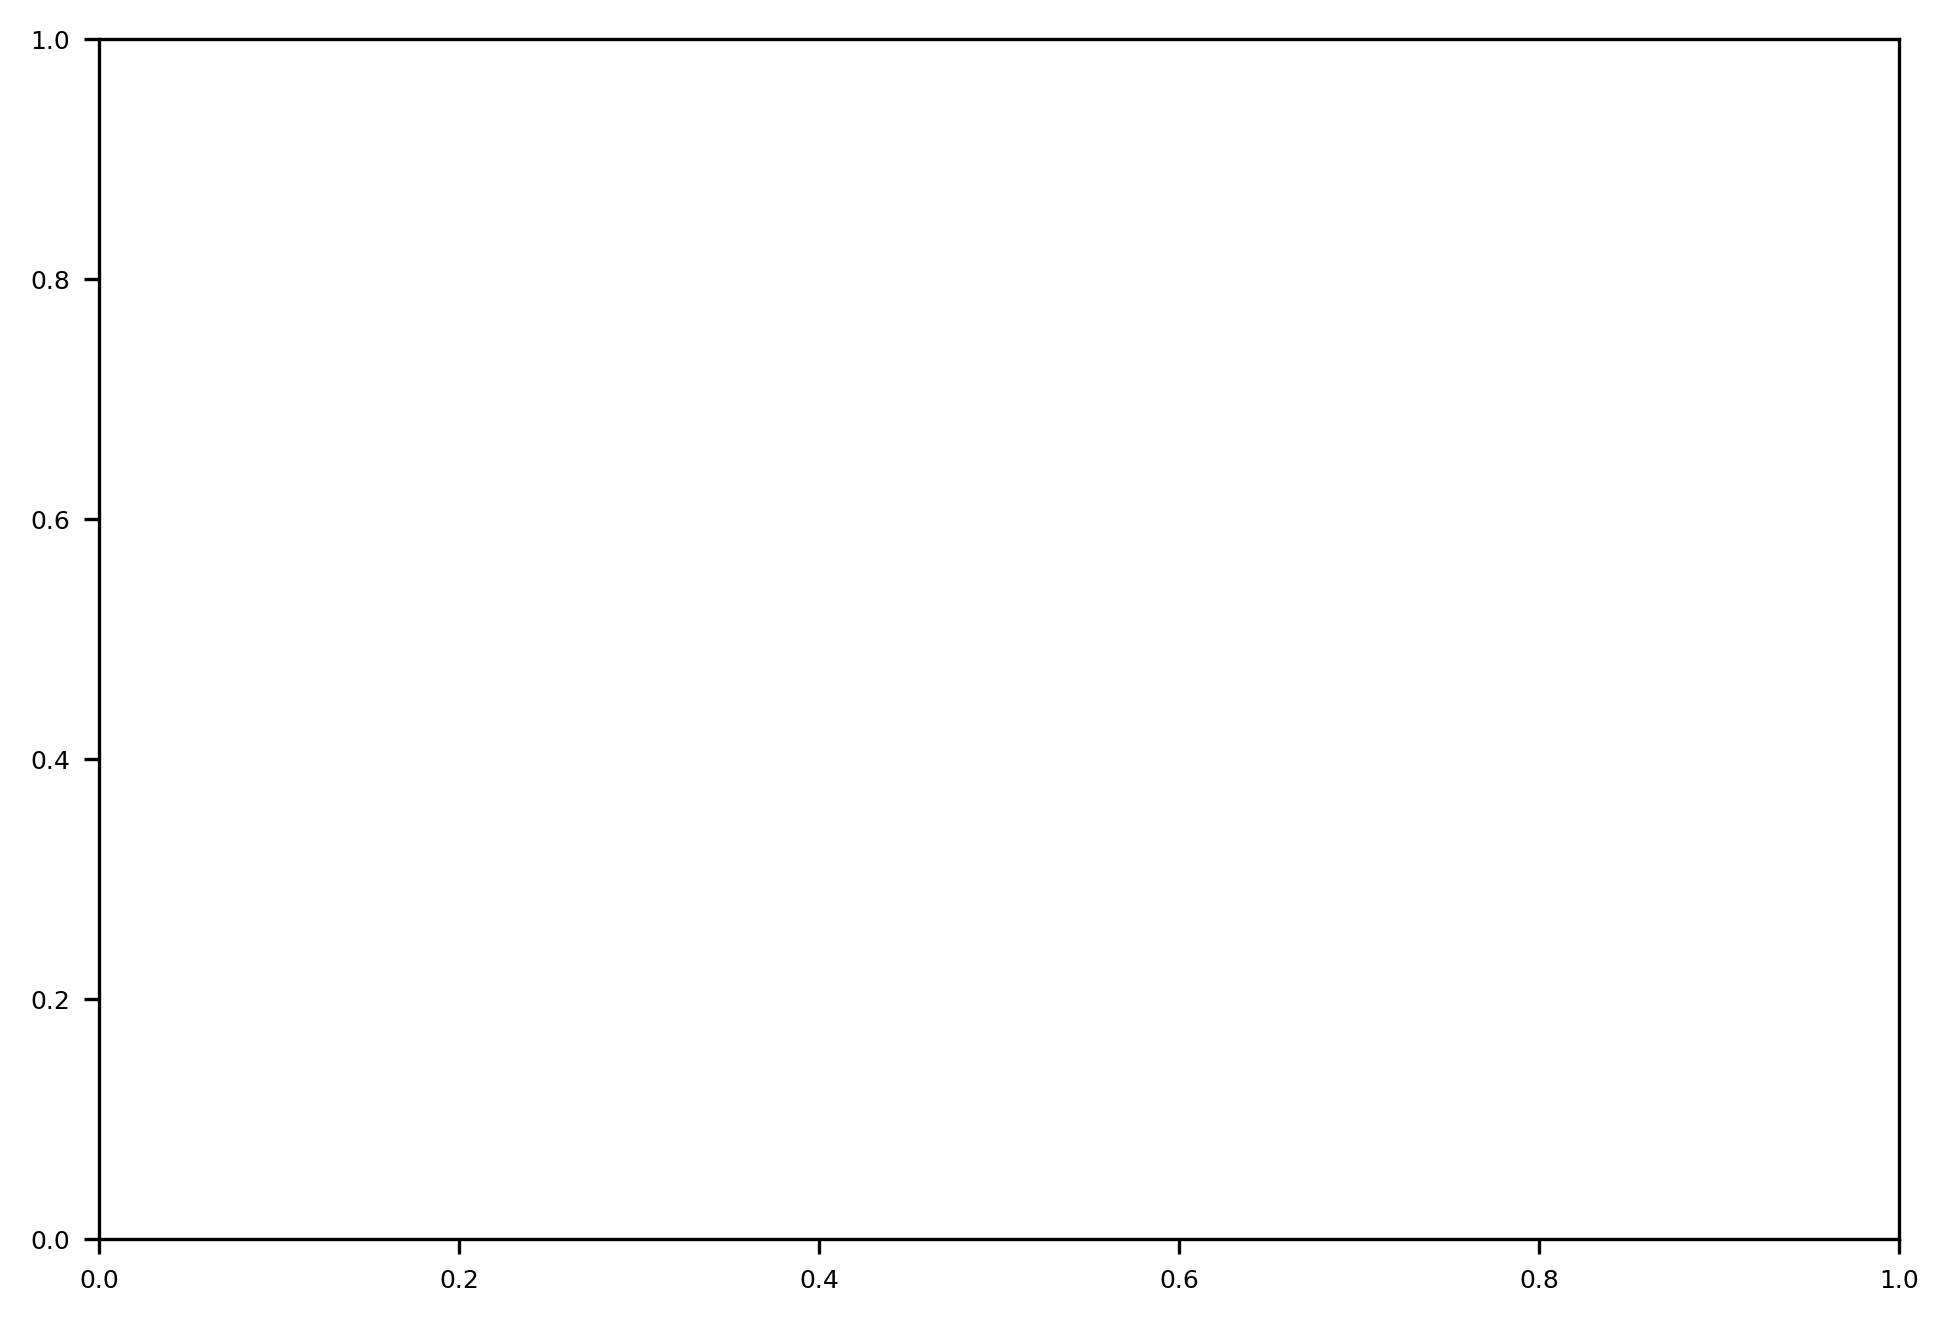

In [61]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['mmore-95-cut', 'mmore-95-all', 'mmore-80-cut', 'mmore-80-all', 'mmore-95-cut', 'mmore-95-all', 'hmmer']
colors= ['green', 'darkgreen', 'yellow', 'orange', 'blue', 'darkblue', 'red']
scalar = mmseqs_times['k95']
data_top = [ fbpruner_times['k95-cut'], fbpruner_times['k95-all'], fbpruner_times['k80-cut'], fbpruner_times['k80-all'], fbpruner_times['k75-cut'], fbpruner_times['k75-all'], hmmer_times['total'] ]
data_btm = [ mmseqs_times['k95'], mmseqs_times['k95'],  mmseqs_times['k80'], mmseqs_times['k80'], mmseqs_times['k75'], mmseqs_times['k75'], 0 ]
ax.bar(xlabels, data_top, color=colors)
ax.bar(xlabels, data_btm, color='black', alpha=0.6 )
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()

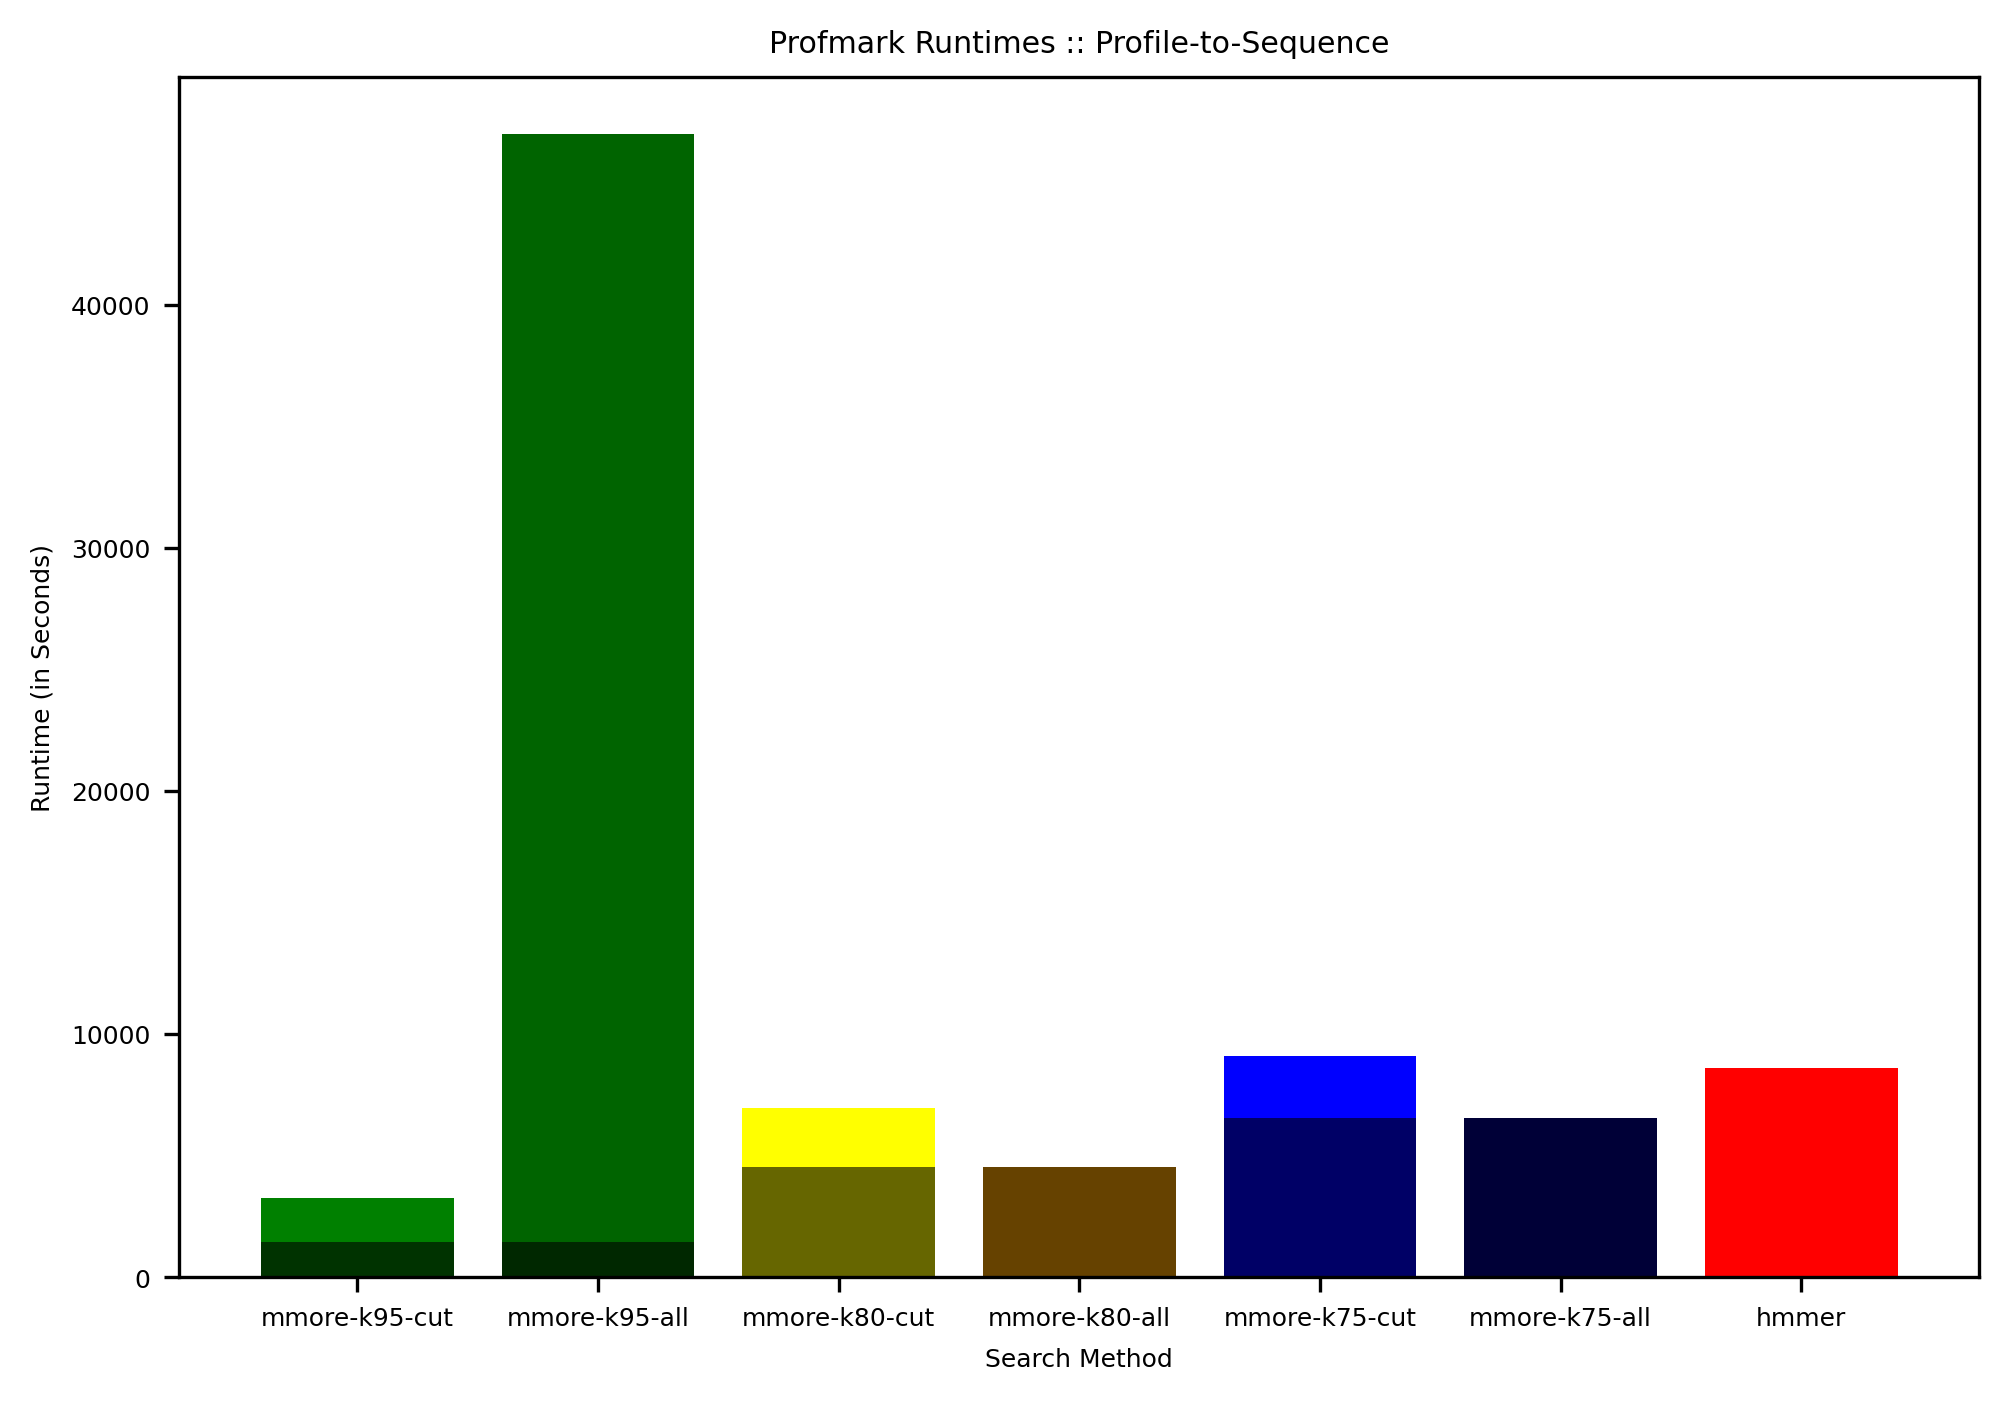

In [68]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['mmore-k95-cut', 'mmore-k95-all', 'mmore-k80-cut', 'mmore-k80-all', 'mmore-k75-cut', 'mmore-k75-all', 'hmmer']
colors= ['green', 'darkgreen', 'yellow', 'orange', 'blue', 'darkblue', 'red']
scalar = mmseqs_times['ps-k95']
data_top = [ mmore_times['ps-k95-cut'], mmore_times['ps-k95-all'], mmore_times['ps-k80-cut'], mmore_times['ps-k80-all'], mmore_times['ps-k75-cut'], mmore_times['ps-k75-all'], hmmer_times['ps-search'] ]
data_btm = [ mmseqs_times['ps-k95'], mmseqs_times['ps-k95'],  mmseqs_times['ps-k80'], mmseqs_times['ps-k80'], mmseqs_times['ps-k75'], mmseqs_times['ps-k75'], 0 ]
ax.bar(xlabels, data_top, color=colors)
ax.bar(xlabels, data_btm, color='black', alpha=0.6 )
plt.title('Profmark Runtimes :: Profile-to-Sequence')
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()